# Data Exploration and Pre_processing

In [143]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud 
from matplotlib import pyplot as plt
import sys
import os
import re
import string

import nltk
from nltk.corpus import stopwords

In [106]:
sys.path.append(os.path.abspath(os.path.join('../')))

from extract_dataframe import read_json
from extract_dataframe import TweetDfExtractor
_, tweet_list = read_json("C:/Users/hp/Desktop/10 accadamay/week0/Twitter-Data-Analysis/data/Economic_Twitter_Data.json")

tweets_df_extractor = TweetDfExtractor(tweet_list)
tweet_df = tweets_df_extractor.get_tweet_df()
tweet_df.head()

File Successfully Saved.!!!


created_at  \
0  Fri Apr 22 22:20:18 +0000 2022   
1  Fri Apr 22 22:19:16 +0000 2022   
2  Fri Apr 22 22:17:28 +0000 2022   
3  Fri Apr 22 22:17:20 +0000 2022   
4  Fri Apr 22 22:13:15 +0000 2022   

                                              source  \
0  <a href="http://twitter.com/download/android" ...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="http://twitter.com/download/android" ...   
3  <a href="http://twitter.com/download/android" ...   
4  <a href="http://twitter.com/download/android" ...   

                                       original_text  clean_text  \
0  RT @nikitheblogger: Irre: Annalena Baerbock sa...         0.0   
1  RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...         0.0   
2  RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...         0.0   
3  RT @WRi007: Die #Deutschen sind ein braves Vol...         0.0   
4  RT @RolandTichy: Baerbock verkündet mal so neb...         0.0   

                                            polarity  subjectivity lang  \
0  RT @nikitheblogger Irre Annalena Baerbock sagt...           0.0   de   
1  RT @sagt_mit Merkel schaffte es in 1 Jahr 1 Mi...           0.0   de   
2  RT @Kryptonoun @WRi007 Pharma in Lebensmitteln...           0.0   de   
3  RT @WRi007 Die #Deutschen sind ein braves Volk...           0.0   de   
4  RT @RolandTichy Baerbock verkndet mal so neben...           0.0   de   

   favorite_count  retweet_count original_author  followers_count  \
0              12            355    McMc74078966                3   
1              12            505    McMc74078966                3   
2              12              4    McMc74078966                3   
3              12            332    McMc74078966                3   
4              12            386    McMc74078966                3   

   friends_count possibly_sensitive  \
0             12               None   
1             12               None   
2             12               None   
3             12               None   
4             12               None   

                                            hashtags  \
0                                                 []   
1                                                 []   
2                                                 []   
3  [{'text': 'Deutschen', 'indices': [16, 26]}, {...   
4                                                 []   

                                       user_mentions place  
0  [{'screen_name': 'nikitheblogger', 'name': 'Ne...        
1  [{'screen_name': 'sagt_mit', 'name': 'Sie sagt...        
2  [{'screen_name': 'Kryptonoun', 'name': 'Krypto...        
3  [{'screen_name': 'WRi007', 'name': 'Wolfgang B...        
4  [{'screen_name': 'RolandTichy', 'name': 'Rolan...

In [107]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   original_text  24625 non-null  object
 1   lang           0 non-null      object
dtypes: object(2)
memory usage: 384.9+ KB


In [108]:
tweet_df.isna()

created_at  source  original_text  clean_text  polarity  subjectivity  \
0           False   False          False       False     False         False   
1           False   False          False       False     False         False   
2           False   False          False       False     False         False   
3           False   False          False       False     False         False   
4           False   False          False       False     False         False   
...           ...     ...            ...         ...       ...           ...   
24620       False   False          False       False     False         False   
24621       False   False          False       False     False         False   
24622       False   False          False       False     False         False   
24623       False   False          False       False     False         False   
24624       False   False          False       False     False         False   

        lang  favorite_count  retweet_count  original_author  followers_count  \
0      False           False          False            False            False   
1      False           False          False            False            False   
2      False           False          False            False            False   
3      False           False          False            False            False   
4      False           False          False            False            False   
...      ...             ...            ...              ...              ...   
24620  False           False          False            False            False   
24621  False           False          False            False            False   
24622  False           False          False            False            False   
24623  False           False          False            False            False   
24624  False           False          False            False            False   

       friends_count  possibly_sensitive  hashtags  user_mentions  place  
0              False                True     False          False  False  
1              False                True     False          False  False  
2              False                True     False          False  False  
3              False                True     False          False  False  
4              False                True     False          False  False  
...              ...                 ...       ...            ...    ...  
24620          False                True     False          False  False  
24621          False                True     False          False  False  
24622          False                True     False          False  False  
24623          False                True     False          False  False  
24624          False                True     False          False  False  

[24625 rows x 16 columns]

In [121]:
from clean_tweets_dataframe import Clean_Tweets

clean_tweets = Clean_Tweets(tweet_df)
tweet_df = clean_tweets.drop_unwanted_column(tweet_df)
tweet_df.columns


Automation in Action...!!!


Index(['created_at', 'source', 'original_text', 'clean_text', 'polarity',
       'subjectivity', 'lang', 'favorite_count', 'retweet_count',
       'original_author', 'followers_count', 'friends_count',
       'possibly_sensitive', 'hashtags', 'user_mentions', 'place'],
      dtype='object')

In [76]:
print("The number of missing value(s): {}".format(tweets.isnull().sum().sum()))
print("Columons having columns value:{}".format(tweets.columns[tweets.isnull().any()]))

The number of missing value(s): 33519
Columons having columns value:Index(['possibly_sensitive', 'place'], dtype='object')


In [122]:
tweet_df.shape

(24625, 16)

In [124]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24625 entries, 0 to 24624
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          24625 non-null  datetime64[ns, UTC]
 1   source              24625 non-null  object             
 2   original_text       24625 non-null  object             
 3   clean_text          24625 non-null  float64            
 4   polarity            24625 non-null  object             
 5   subjectivity        24625 non-null  float64            
 6   lang                24625 non-null  object             
 7   favorite_count      24625 non-null  int64              
 8   retweet_count       24625 non-null  int64              
 9   original_author     24625 non-null  object             
 10  followers_count     24625 non-null  int64              
 11  friends_count       24625 non-null  int64              
 12  possibly_sensitive  0 non-null  

In [125]:
# remove non-alphabetic characters
tweet_df["clean_text"] = tweet_df["original_text"].str.replace("[^a-zA-Z#@\s]", "")
tweet_df["clean_text"] = tweet_df["clean_text"].str.replace("\n", "\s")
tweet_df[["original_text", "clean_text"]]

original_text  \
0      RT @nikitheblogger: Irre: Annalena Baerbock sa...   
1      RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...   
2      RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...   
3      RT @WRi007: Die #Deutschen sind ein braves Vol...   
4      RT @RolandTichy: Baerbock verkündet mal so neb...   
...                                                  ...   
24620  RT @waglenikhil: आपल्या घरातल्या कोणत्याही कार...   
24621  RT @yadavtejashwi: चौहरमल नगर, फुलवारी शरीफ मे...   
24622  RT @Parthtiwari25: Gujarat Congress MLA arrest...   
24623  RT @news24tvchannel: CM नीतीश कुमार ने तेजस्वी...   
24624  RT @suvegrathi: भगवान और खुदा आपस में बात कर र...   

                                              clean_text  
0      RT @nikitheblogger Irre Annalena Baerbock sagt...  
1      RT @sagtmit Merkel schaffte es in  Jahr  Milli...  
2      RT @Kryptonoun @WRi Pharma in Lebensmitteln Tr...  
3      RT @WRi Die #Deutschen sind ein braves Volk Mi...  
4      RT @RolandTichy Baerbock verkndet mal so neben...  
...                                                  ...  
24620                        RT @waglenikhil              
24621            RT @yadavtejashwi                        
24622  RT @Parthtiwari Gujarat Congress MLA arrested ...  
24623        RT @newstvchannel CM          \s\s           
24624  RT @suvegrathi         \s     \s     \s @Bajpa...  

[24625 rows x 2 columns]

In [128]:
tweet_df.to_csv("./data/processed_tweet_data.csv",index=False)

# Explorating Data

In [131]:
tweet_df=pd.read_csv('./data/processed_tweet_data.csv')
tweet_df.head()

created_at  \
0  2022-04-22 22:20:18+00:00   
1  2022-04-22 22:19:16+00:00   
2  2022-04-22 22:17:28+00:00   
3  2022-04-22 22:17:20+00:00   
4  2022-04-22 22:13:15+00:00   

                                              source  \
0  <a href="http://twitter.com/download/android" ...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="http://twitter.com/download/android" ...   
3  <a href="http://twitter.com/download/android" ...   
4  <a href="http://twitter.com/download/android" ...   

                                       original_text  \
0  RT @nikitheblogger: Irre: Annalena Baerbock sa...   
1  RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...   
2  RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...   
3  RT @WRi007: Die #Deutschen sind ein braves Vol...   
4  RT @RolandTichy: Baerbock verkündet mal so neb...   

                                          clean_text  \
0  RT @nikitheblogger Irre Annalena Baerbock sagt...   
1  RT @sagtmit Merkel schaffte es in  Jahr  Milli...   
2  RT @Kryptonoun @WRi Pharma in Lebensmitteln Tr...   
3  RT @WRi Die #Deutschen sind ein braves Volk Mi...   
4  RT @RolandTichy Baerbock verkndet mal so neben...   

                                            polarity  subjectivity lang  \
0  RT @nikitheblogger Irre Annalena Baerbock sagt...           0.0   de   
1  RT @sagt_mit Merkel schaffte es in 1 Jahr 1 Mi...           0.0   de   
2  RT @Kryptonoun @WRi007 Pharma in Lebensmitteln...           0.0   de   
3  RT @WRi007 Die #Deutschen sind ein braves Volk...           0.0   de   
4  RT @RolandTichy Baerbock verkndet mal so neben...           0.0   de   

   favorite_count  retweet_count original_author  followers_count  \
0              12            355    McMc74078966                3   
1              12            505    McMc74078966                3   
2              12              4    McMc74078966                3   
3              12            332    McMc74078966                3   
4              12            386    McMc74078966                3   

   friends_count  possibly_sensitive  \
0             12                 NaN   
1             12                 NaN   
2             12                 NaN   
3             12                 NaN   
4             12                 NaN   

                                            hashtags  \
0                                                 []   
1                                                 []   
2                                                 []   
3  [{'text': 'Deutschen', 'indices': [16, 26]}, {...   
4                                                 []   

                                       user_mentions place  
0  [{'screen_name': 'nikitheblogger', 'name': 'Ne...   NaN  
1  [{'screen_name': 'sagt_mit', 'name': 'Sie sagt...   NaN  
2  [{'screen_name': 'Kryptonoun', 'name': 'Krypto...   NaN  
3  [{'screen_name': 'WRi007', 'name': 'Wolfgang B...   NaN  
4  [{'screen_name': 'RolandTichy', 'name': 'Rolan...   NaN

In [81]:
re.findall?

In [132]:
def find_hashtags(tweet):
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)',tweet)

In [133]:
tweets_df['hashtags'] = tweets_df.original_text.apply(find_hashtags) 
print(tweets_df['hashtags'])

0                                                       []
1                                                       []
2                                                       []
3        [#Deutschen, #Spritpreisen, #inflation, #Abgaben]
4                                                       []
                               ...                        
24620                                                   []
24621                                                   []
24622                                                   []
24623                                                   []
24624                                      [#IndiaAgainst]
Name: hashtags, Length: 24625, dtype: object


In [134]:
hashtags_list_df = tweets_df.loc[
    tweets_df.hashtags.apply(
        lambda hashtags_list: hashtags_list !=[]
    ),['hashtags']]
hashtags_list_df

hashtags
3      [#Deutschen, #Spritpreisen, #inflation, #Abgaben]
6                                            [#Baerbock]
11                             [#IchHabeNICHTMitgemacht]
12                                            [#Assange]
15                                     [#Assange, #Held]
...                                                  ...
24571  [#PNPKakampiMo, #WeServeAndProtect, #TeamPNP, ...
24572  [#PNPKakampiMo, #WeServeAndProtect, #TeamPNP, ...
24574  [#PNPKakampiMo, #WeServeAndProtect, #TeamPNP, ...
24589                                       [#AAP, #AAP]
24624                                    [#IndiaAgainst]

[8143 rows x 1 columns]

In [135]:
flattened_hashtags_df= pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns =['hashtag'])
flattened_hashtags_df

hashtag
0                 #Deutschen
1              #Spritpreisen
2                 #inflation
3                   #Abgaben
4                  #Baerbock
...                      ...
19367               #TeamPNP
19368  #PCADGWESTERNMINDANAO
19369                   #AAP
19370                   #AAP
19371          #IndiaAgainst

[19372 rows x 1 columns]

In [136]:
tweets_df["flattened_hashtags"]= flattened_hashtags_df
tweets_df

original_text  \
0      RT @nikitheblogger: Irre: Annalena Baerbock sa...   
1      RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...   
2      RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...   
3      RT @WRi007: Die #Deutschen sind ein braves Vol...   
4      RT @RolandTichy: Baerbock verkündet mal so neb...   
...                                                  ...   
24620  RT @waglenikhil: आपल्या घरातल्या कोणत्याही कार...   
24621  RT @yadavtejashwi: चौहरमल नगर, फुलवारी शरीफ मे...   
24622  RT @Parthtiwari25: Gujarat Congress MLA arrest...   
24623  RT @news24tvchannel: CM नीतीश कुमार ने तेजस्वी...   
24624  RT @suvegrathi: भगवान और खुदा आपस में बात कर र...   

                                                hashtags flattened_hashtags  
0                                                     []         #Deutschen  
1                                                     []      #Spritpreisen  
2                                                     []         #inflation  
3      [#Deutschen, #Spritpreisen, #inflation, #Abgaben]           #Abgaben  
4                                                     []          #Baerbock  
...                                                  ...                ...  
24620                                                 []                NaN  
24621                                                 []                NaN  
24622                                                 []                NaN  
24623                                                 []                NaN  
24624                                    [#IndiaAgainst]                NaN  

[24625 rows x 3 columns]

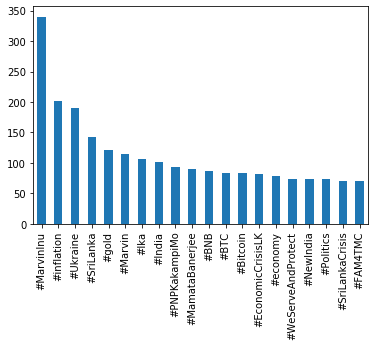

In [90]:
tweets_df['flattened_hashtags'].value_counts()[:20].plot(kind='bar')

In [139]:
#select only tweets with english 
English_tweets = tweet_df.loc[tweet_df['lang'] =="en"]
English_tweets

created_at  \
38     2022-04-22 22:17:05+00:00   
39     2022-04-22 13:44:53+00:00   
41     2022-04-22 06:10:34+00:00   
42     2022-04-21 17:22:09+00:00   
43     2022-04-21 10:32:26+00:00   
...                          ...   
24584  2022-04-22 15:22:56+00:00   
24586  2022-04-22 15:22:29+00:00   
24596  2022-04-22 15:01:27+00:00   
24599  2022-04-22 14:58:12+00:00   
24622  2022-04-22 14:44:35+00:00   

                                                  source  \
38     <a href="http://twitter.com/download/android" ...   
39     <a href="http://twitter.com/download/android" ...   
41     <a href="http://twitter.com/download/android" ...   
42     <a href="http://twitter.com/download/android" ...   
43     <a href="http://twitter.com/download/android" ...   
...                                                  ...   
24584  <a href="http://twitter.com/download/iphone" r...   
24586  <a href="http://twitter.com/download/iphone" r...   
24596  <a href="http://twitter.com/download/iphone" r...   
24599  <a href="http://twitter.com/download/iphone" r...   
24622  <a href="http://twitter.com/download/iphone" r...   

                                           original_text  \
38     RT @NorthstarCharts: The 10-year yield is tell...   
39     RT @MichaelAArouet: German 10y mortgage rate w...   
41           RT @goldseek: When? https://t.co/kO2FfHKaZg   
42     RT @charliebilello: The 30-year mortgage rate ...   
43     RT @biancoresearch: Rates rise until something...   
...                                                  ...   
24584  RT @CHARANJITCHANNI: Best wishes &amp; heartfe...   
24586  RT @pbhushan1: Thank you @BajpayeeManoj for th...   
24596  RT @s_shreyatweets: Agree ?👇 https://t.co/R54Z...   
24599  RT @tejjINC: 1. Peace Yatra by Late Sunil Dutt...   
24622  RT @Parthtiwari25: Gujarat Congress MLA arrest...   

                                              clean_text  \
38     RT @NorthstarCharts The year yield is telling ...   
39     RT @MichaelAArouet German y mortgage rate went...   
41                   RT @goldseek When httpstcokOFfHKaZg   
42     RT @charliebilello The year mortgage rate in t...   
43     RT @biancoresearch Rates rise until something ...   
...                                                  ...   
24584  RT @CHARANJITCHANNI Best wishes amp heartfelt ...   
24586  RT @pbhushan Thank you @BajpayeeManoj for this...   
24596           RT @sshreyatweets Agree  httpstcoRZjwkGB   
24599  RT @tejjINC  Peace Yatra by Late Sunil Dutt fr...   
24622  RT @Parthtiwari Gujarat Congress MLA arrested ...   

                                                polarity  subjectivity lang  \
38     RT @NorthstarCharts The 10year yield is tellin...      0.540000   en   
39     RT @MichaelAArouet German 10y mortgage rate we...      0.175000   en   
41                  RT @goldseek When httpstcokO2FfHKaZg      0.000000   en   
42     RT @charliebilello The 30year mortgage rate in...      0.183333   en   
43     RT @biancoresearch Rates rise until something ...      0.400000   en   
...                                                  ...           ...  ...   
24584  RT @CHARANJITCHANNI Best wishes amp heartfelt ...      0.729630   en   
24586  RT @pbhushan1 Thank you @BajpayeeManoj for thi...      1.000000   en   
24596        RT @s_shreyatweets Agree httpstcoR54Zjw3kGB      0.000000   en   
24599  RT @tejjINC 1 Peace Yatra by Late Sunil Dutt f...      0.600000   en   
24622  RT @Parthtiwari25 Gujarat Congress MLA arreste...      0.000000   en   

       favorite_count  retweet_count  original_author  followers_count  \
38                 55             43  davideiacovozzi               18   
39                 55             32  davideiacovozzi               18   
41                 55             26  davideiacovozzi               18   
42                 55            213  davideiacovozzi               18   
43                 55            417  davideiacovozzi               18   
...               ...            

# Processing Text


In [144]:
#text Preprocessing
English_tweets['clean_text']=English_tweets['clean_text'].astype(str)
English_tweets['clean_text'] = English_tweets['clean_text'].apply(lambda x: x.lower())
English_tweets['clean_text']= English_tweets['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))


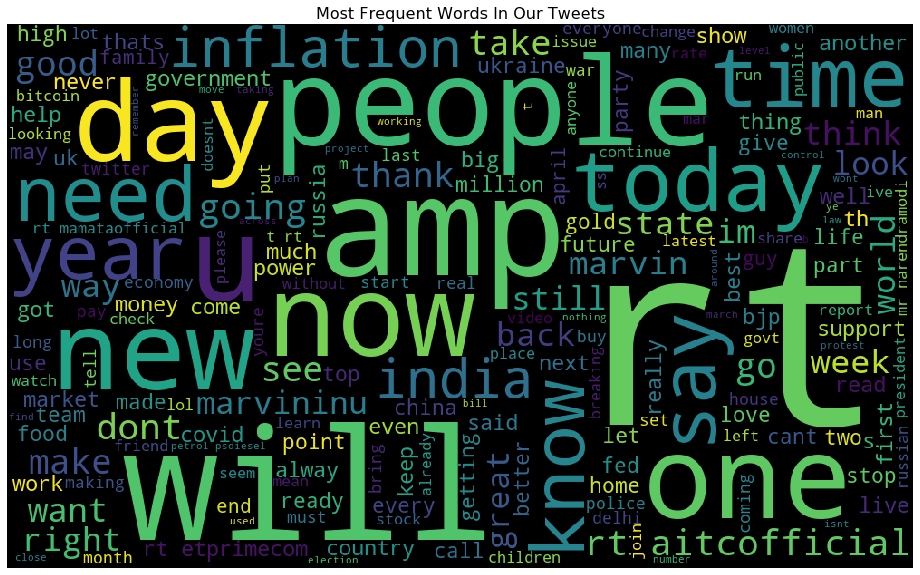

In [145]:
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(English_tweets.clean_text .values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()